In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import

In [2]:
#import df
tweets = pd.read_csv('train.csv')

In [3]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


## EDA

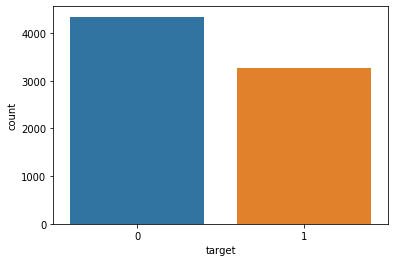

In [7]:
#explore target
sns.countplot(x='target',data=tweets)
#observations: fairly even

In [8]:
#explore keyword var
tweets['keyword'].value_counts().head(50)

fatalities     45
deluge         42
armageddon     42
body%20bags    41
sinking        41
harm           41
damage         41
windstorm      40
evacuate       40
outbreak       40
collided       40
twister        40
siren          40
fear           40
earthquake     39
weapon         39
sunk           39
wreckage       39
collision      39
explosion      39
famine         39
whirlwind      39
sinkhole       39
wrecked        39
flames         39
weapons        39
derailment     39
hellfire       39
derailed       38
bombed         38
hurricane      38
upheaval       38
ambulance      38
fatal          38
thunder        38
drowned        38
injury         38
explode        38
blaze          38
typhoon        38
flooding       38
oil%20spill    38
fire           38
deaths         38
panic          37
mudslide       37
debris         37
police         37
crush          37
hostages       37
Name: keyword, dtype: int64

In [9]:
tweets['keyword'].nunique()

221

In [10]:
#explore location
tweets['location'].value_counts()

USA                  104
New York              71
United States         50
London                45
Canada                29
                    ... 
Central Illinois       1
New York Brooklyn      1
Concord, N.C.          1
Storybrooke            1
New Your               1
Name: location, Length: 3341, dtype: int64

In [11]:
tweets['location'].nunique()

3341

In [12]:
tweets.groupby(by='target').describe()

id                                                           \
         count         mean          std   min      25%     50%     75%   
target                                                                    
0       4342.0  5276.446338  3157.206802  23.0  2513.25  5243.5  8038.5   
1       3271.0  5661.608071  3097.094809   1.0  3104.50  5676.0  8252.0   

                 
            max  
target           
0       10848.0  
1       10873.0

In [13]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Train/Test Split

In [14]:
from sklearn.model_selection import train_test_split

X = tweets['text']
y = tweets['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1024)

In [15]:
#preview X_train
X_train.head()

2658    @BldrCOSheriff says 2nd grenade found is 'youn...
2423                  three episodes left the end is nigh
1181    #computers #gadgets Two giant cranes holding a...
3335    Rocky fire in Northern California swells to 60...
2042    I wish I could get Victoria's Secret on front....
Name: text, dtype: object

## Text Preprocessing

In [16]:
#import libraries
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
import re
import unidecode
import string

In [17]:
#define preprocessing function

stop_words = set(stopwords.words('english'))

lemmer = WordNetLemmatizer()

def preprocess(doc):
    
    doc = doc.lower() #lower case everything
    
    doc = unidecode.unidecode(doc)
    
    doc = re.sub(r'\b\d+\b', 'NUM', doc) #replace numbers with the string "NUM"
    
    doc = [lemmer.lemmatize(w) for w in doc.split() if w not in stop_words] #lemmatize each word
    #doc = [stemmer.stem(w) for w in doc.split() if w not in stop_words]

    return ' '.join(doc)

## Feature Engineering

In [18]:
from textblob import TextBlob
from textstat import flesch_reading_ease, syllable_count

#character count
def character_count(corpus):
    return np.array([len(doc) for doc in corpus]).reshape(-1,1)

#punctuation count
def _get_punc(doc):
    return len([a for a in doc if a in string.punctuation])

def punc_count(corpus):
    return np.array([_get_punc(doc) for doc in corpus]).reshape(-1,1)

#caps count
def _get_caps(doc):
    return sum([1 for a in doc if a.isupper()])

def caps_count(corpus):
    return np.array([_get_caps(doc) for doc in corpus]).reshape(-1,1)

#count of "?"
def question_count(corpus):
    return np.array([doc.count('?') for doc in corpus]).reshape(-1,1)

#count of "!"
def exclamation_count(corpus):
    return np.array([doc.count('!') for doc in corpus]).reshape(-1,1)

#count of "@" (tweet mentions)
def reply_count(corpus):
    return np.array([doc.count('@') for doc in corpus]).reshape(-1,1)

#count of "#" (hashtags)
def hashtag_count(corpus):
    return np.array([doc.count('#') for doc in corpus]).reshape(-1,1)

#sentiment
def sentiment(corpus):
    return np.array([TextBlob(doc).sentiment.polarity for doc in corpus]).reshape(-1,1)

#readability
def readability(corpus):
    return np.array([flesch_reading_ease(doc) for doc in corpus]).reshape(-1,1)

## Build Pipeline

In [19]:
#import pipeline features and ml algorithms to try
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [183]:
#build pipeline

#define vectorizer
vectorizer = CountVectorizer(preprocessor = preprocess, #can use CountVectorizer, TFIDFVectorizer (CV was better here)
                            max_features = 2000,
                            ngram_range = [1,3],
                            max_df = 0.25,
                            min_df = 0.001)

#potential ML algorithms to apply
lr = LogisticRegression(solver='lbfgs', random_state = 1024)
rf = RandomForestClassifier(criterion='entropy', random_state = 1024, min_samples_split = 10, max_depth = 50, n_estimators=500, class_weight="balanced")
nb = MultinomialNB()
dt = DecisionTreeClassifier(random_state = 1024, min_samples_split = 10, max_depth = 6)
svc = LinearSVC(random_state = 1024, C=10, class_weight="balanced")
mlp = MLPClassifier(random_state = 1024, verbose = 2, max_iter = 150, activation = 'logistic')
gbt = GradientBoostingClassifier(random_state = 1024, min_samples_split = 5, max_depth = 10, n_estimators=500, min_samples_leaf=1)

#add in our features (via functions defined above in feature engineering)
feature_processing = FeatureUnion([
    ('vectorizer', Pipeline([('cv', vectorizer), ])),
    ('character_count', FunctionTransformer(character_count, validate=False)),
    ('punc_count', FunctionTransformer(punc_count, validate=False)),
    ('caps_count', FunctionTransformer(caps_count, validate=False)),
    ('question_count', FunctionTransformer(question_count, validate=False)),
    ('exclamation_count', FunctionTransformer(exclamation_count, validate=False)),
    ('reply_count', FunctionTransformer(reply_count, validate=False)),
    ('hashtag_count', FunctionTransformer(hashtag_count, validate=False)),
    ('sentiment', FunctionTransformer(sentiment, validate=False)),
    ('readability', FunctionTransformer(readability, validate=False)),
])

steps = [('features', feature_processing)]

pipe = Pipeline([('features', feature_processing), ('clf', gbt)]) #apply ML algo here

#hyperparameter tuning (for ensembles (rf and gbt))
param_grid = {
    'clf__n_estimators': [100, 250, 500],
    'clf__min_samples_split': [5, 10, 15],
    'clf__max_depth': [5, 10, 25],
    'clf__min_samples_leaf': [1, 2, 5],
}

search = GridSearchCV(pipe, param_grid, cv = 3, n_jobs = 3, scoring = 'f1_micro', return_train_score = True, verbose=2)

## Modeling

In [184]:
#fit the model on training data (note which to use - pipe for no gridsearch)

#pipe.fit(X_train, y_train)
search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  9.9min
[Parallel(n_jobs=3)]: Done 243 out of 243 | elapsed: 21.2min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('vectorizer',
                                                                        Pipeline(steps=[('cv',
                                                                                         CountVectorizer(max_df=0.25,
                                                                                                         max_features=2000,
                                                                                                         min_df=0.001,
                                                                                                         ngram_range=[1,
                                                                                                                      3],
                                                                                                         preprocessor=<function preprocess at 0x

In [185]:
#make predictions on test set

#pred_val = pipe.predict(X_val)
pred_val = search.predict(X_val)

In [186]:
#preview the predictions
pred_val

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

## Model Evaluation

In [187]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val))
print("F1 score = {:.2f}".format(f1_score(y_val, pred_val, average='macro')))

#MODEL PERFORMANCE ON VALIDATION SET (using Count Vectorizer):
    #LR: F1 = 76%
    #RF: F1 = 77%
    #NB: F1 = 78%
    #DT: F1 = 66%
    #SVC: F1 = 79%
    #MLP: F1 = 78%
    #GBT: F1 = 79% (80%)

[[973 122]
 [245 564]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1095
           1       0.82      0.70      0.75       809

    accuracy                           0.81      1904
   macro avg       0.81      0.79      0.80      1904
weighted avg       0.81      0.81      0.80      1904

F1 score = 0.80


## Build Submission (Model on Test Set)

In [188]:
#import sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

In [189]:
#import test df
tweets_testset = pd.read_csv('test.csv')

In [190]:
tweets_testset.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [191]:
#use our pipeline to create predictions on official test set

#pred_test = pipe.predict(tweets_testset['text'])
pred_test = search.predict(tweets_testset['text'])

In [192]:
#preview predictions
pred_test

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [193]:
#add to the submission file
sample_submission["target"] = pred_test

In [194]:
#preview our submission file
sample_submission

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [195]:
#export our predictions to csv for submission
sample_submission.to_csv("Count Vectorizer Pipeline GBT Classifier 3.csv", index=False)